# Find the correlation between companies using keyword data

### 1. Load data

In [1]:
! ls keyword | wc -l

    2155


In [2]:
! ls keyword

000020.csv 007340.csv 025320.csv 047050.csv 075180.csv 111770.csv 214150.csv
000040.csv 007370.csv 025440.csv 047080.csv 075580.csv 111820.csv 214180.csv
000050.csv 007390.csv 025530.csv 047310.csv 075970.csv 111870.csv 214270.csv
000060.csv 007460.csv 025540.csv 047400.csv 076080.csv 112040.csv 214310.csv
000070.csv 007530.csv 025550.csv 047560.csv 076610.csv 112240.csv 214320.csv
000080.csv 007540.csv 025560.csv 047770.csv 077280.csv 112610.csv 214330.csv
000100.csv 007570.csv 025620.csv 047810.csv 077360.csv 113810.csv 214370.csv
000120.csv 007590.csv 025750.csv 047820.csv 077500.csv 114090.csv 214390.csv
000140.csv 007610.csv 025770.csv 047920.csv 077970.csv 114120.csv 214420.csv
000150.csv 007630.csv 025820.csv 048260.csv 078000.csv 114190.csv 214430.csv
000180.csv 007660.csv 025860.csv 048410.csv 078020.csv 114450.csv 214450.csv
000210.csv 007680.csv 025870.csv 048430.csv 078070.csv 114570.csv 214680.csv
000220.csv 007690.csv 025880.csv 048470.csv 078130.csv 114630.csv 214870.csv

In [71]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [72]:
path = "./keyword"
csvs = glob.glob(path + "/*.csv")

In [117]:
kospi = pd.read_csv('./code_comp.csv', names=['종목코드', '기업명'], header=0, dtype={'종목코드': str, '기업명': str})
kosdaq = pd.read_csv('./code_comp_kosdaq.csv', names=['종목코드', '기업명'], header=0, dtype={'종목코드': str, '기업명': str})

In [74]:
comp_code = pd.concat([kospi, kosdaq]).set_index('종목코드')
comp_code_cn = pd.concat([kospi, kosdaq]).set_index('기업명')

In [75]:
data = []
for csv in csvs:
    name = os.path.splitext(os.path.basename(csv))[0].lstrip('0')
    try:
        data.append(pd.read_csv(csv, names=['period', comp_code.loc[name]['기업명']], header=0))
    except:
        print(int(name))
        continue

In [76]:
df = pd.concat(data, axis=1)

In [77]:
# drops duplicated columns
df = df.loc[:,~df.columns.duplicated()].set_index('period')

In [96]:
df = df.fillna(0)

In [97]:
corr = df.corr()

In [98]:
threshold = 0.7

In [99]:
top_corrs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
top_corrs = top_corrs[top_corrs > 0.7]

## 상관관계가 가장 높은 기업 쌍 (상관관계 0.7 이상)

In [103]:
top_corrs

한진칼        사조산업         0.977774
JB금융지주     사조산업         0.966122
우리금융지주     크라운제과        0.962769
코리아써키트     JB금융지주       0.961880
한진칼        JB금융지주       0.961393
코리아써키트     우리금융지주       0.958610
           크라운제과        0.954296
크라운제과      JB금융지주       0.954156
우리금융지주     JB금융지주       0.953703
한국제5호스팩    엔에이치스팩12호    0.953234
크라운제과      사조산업         0.951458
일성신약       크라운제과        0.950053
우리금융지주     사조산업         0.948995
갤럭시아에스엠    SBS          0.945572
일성신약       우리금융지주       0.944548
한진칼        크라운제과        0.942129
인바디        에버다임         0.941553
우리금융지주     포스코          0.941229
일성신약       우리종금         0.941204
코리아써키트     금강공업         0.939944
삼성카드       BYC          0.939152
코리아써키트     우리종금         0.938456
동원F&B      코프라          0.938354
백금T&A      대주산업         0.937963
일성신약       두산인프라코어      0.937619
우리금융지주     한진칼          0.937406
우리종금       크라운제과        0.936600
우리금융지주     우리종금         0.936318
포스코        크라운제과        0.934955
코리아써키트     BYC          0.934583
          

In [100]:
tops = top_corrs.head().index.values

## 상관관계 가장 높은 5개 기업 쌍

In [113]:
top_corrs.head()

한진칼     사조산업      0.977774
JB금융지주  사조산업      0.966122
우리금융지주  크라운제과     0.962769
코리아써키트  JB금융지주    0.961880
한진칼     JB금융지주    0.961393
dtype: float64

## 뭐여 이게

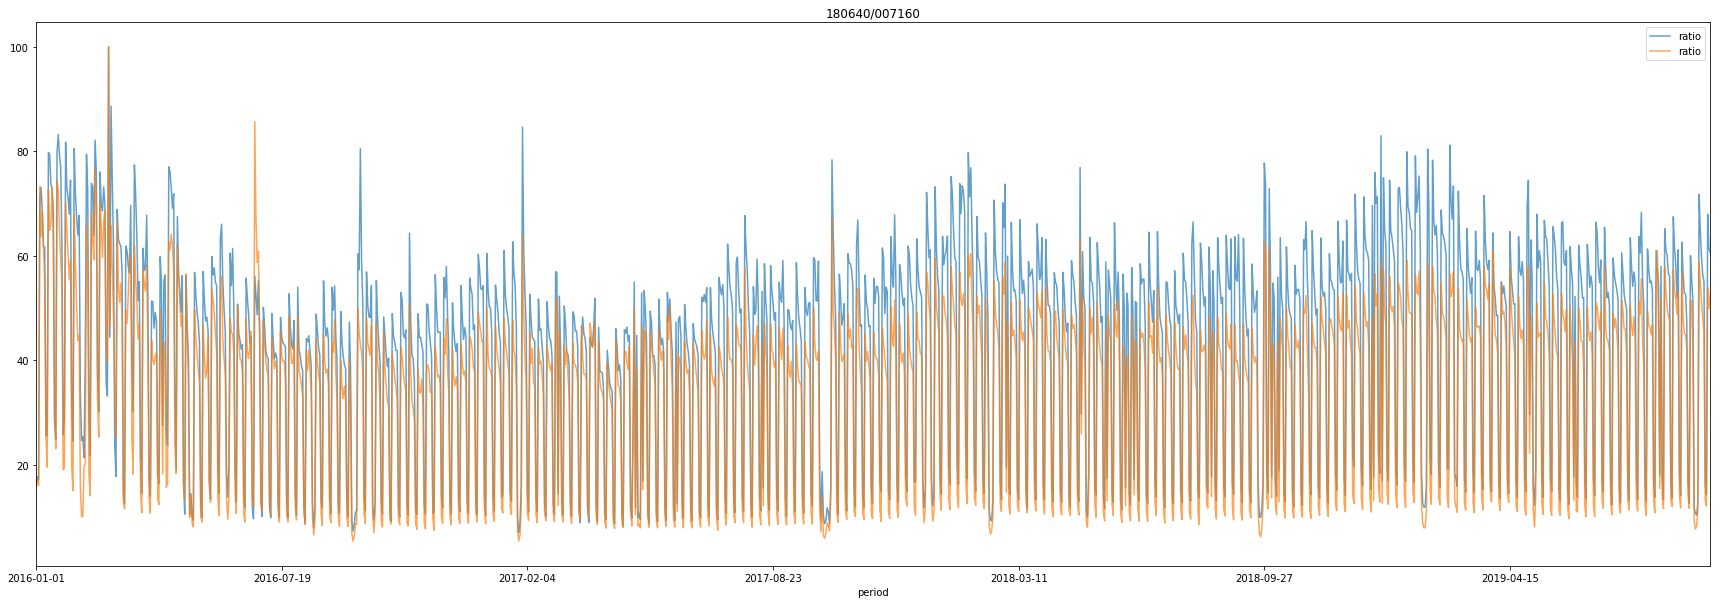

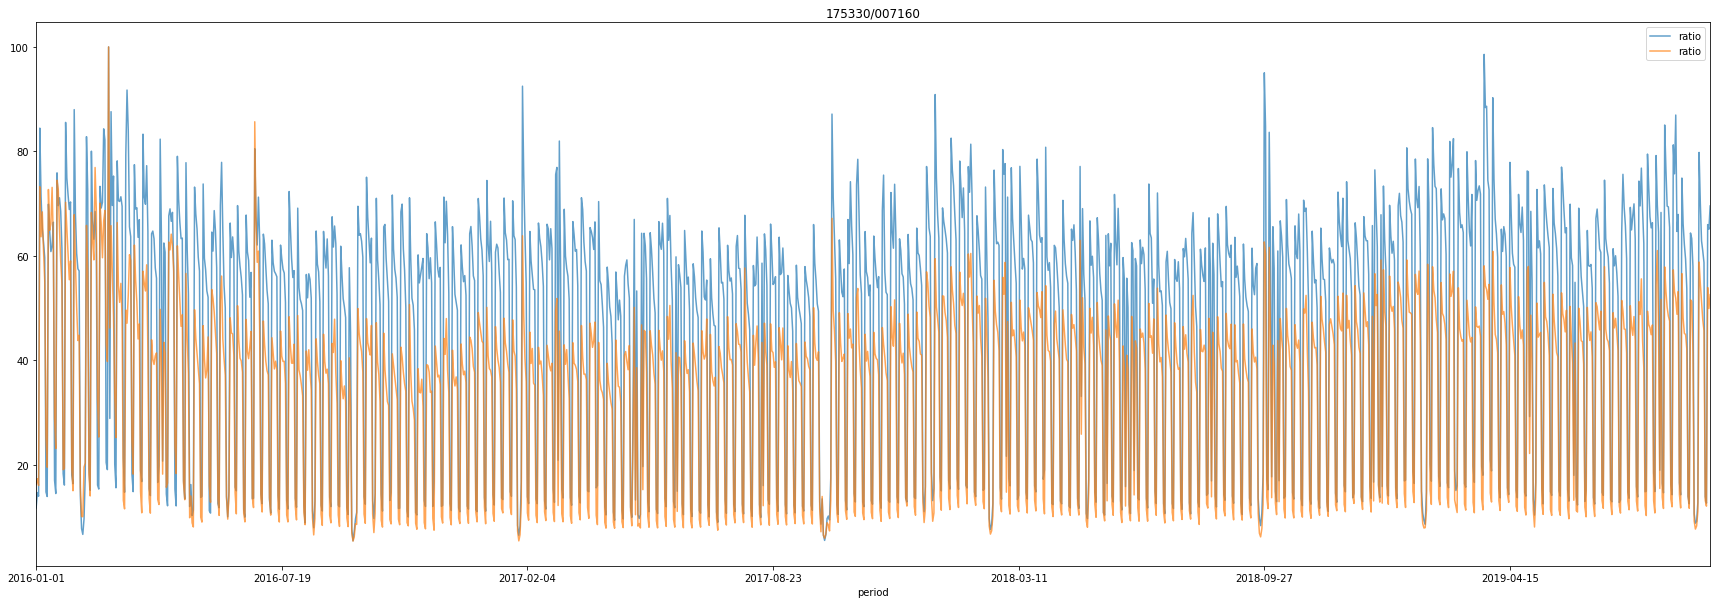

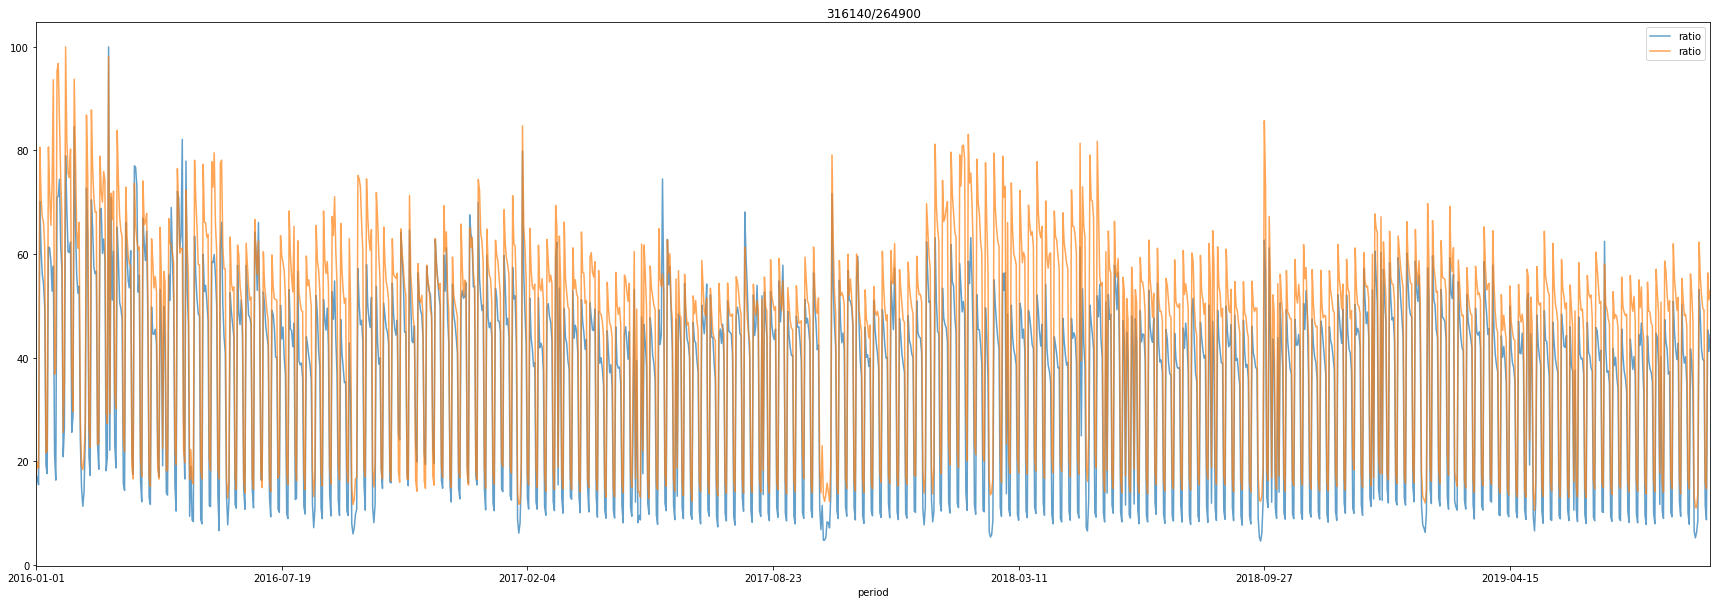

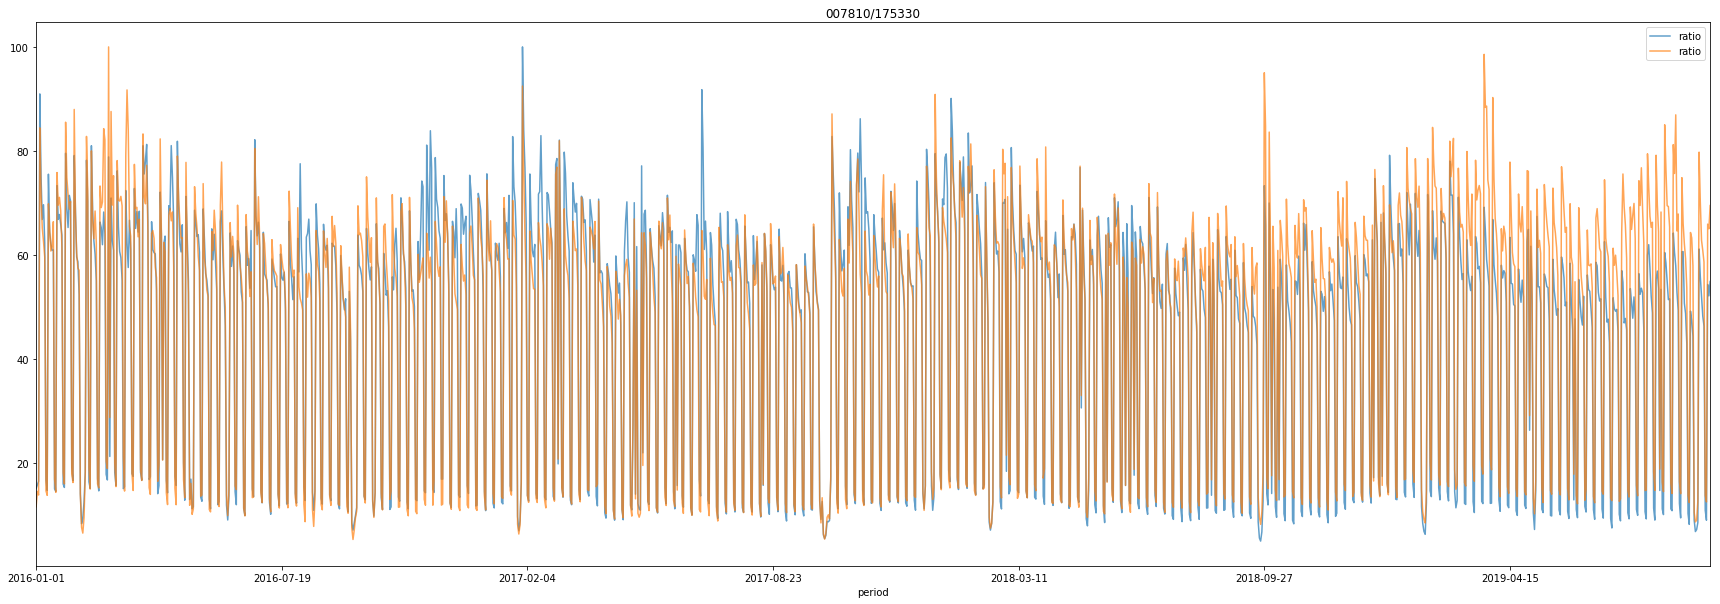

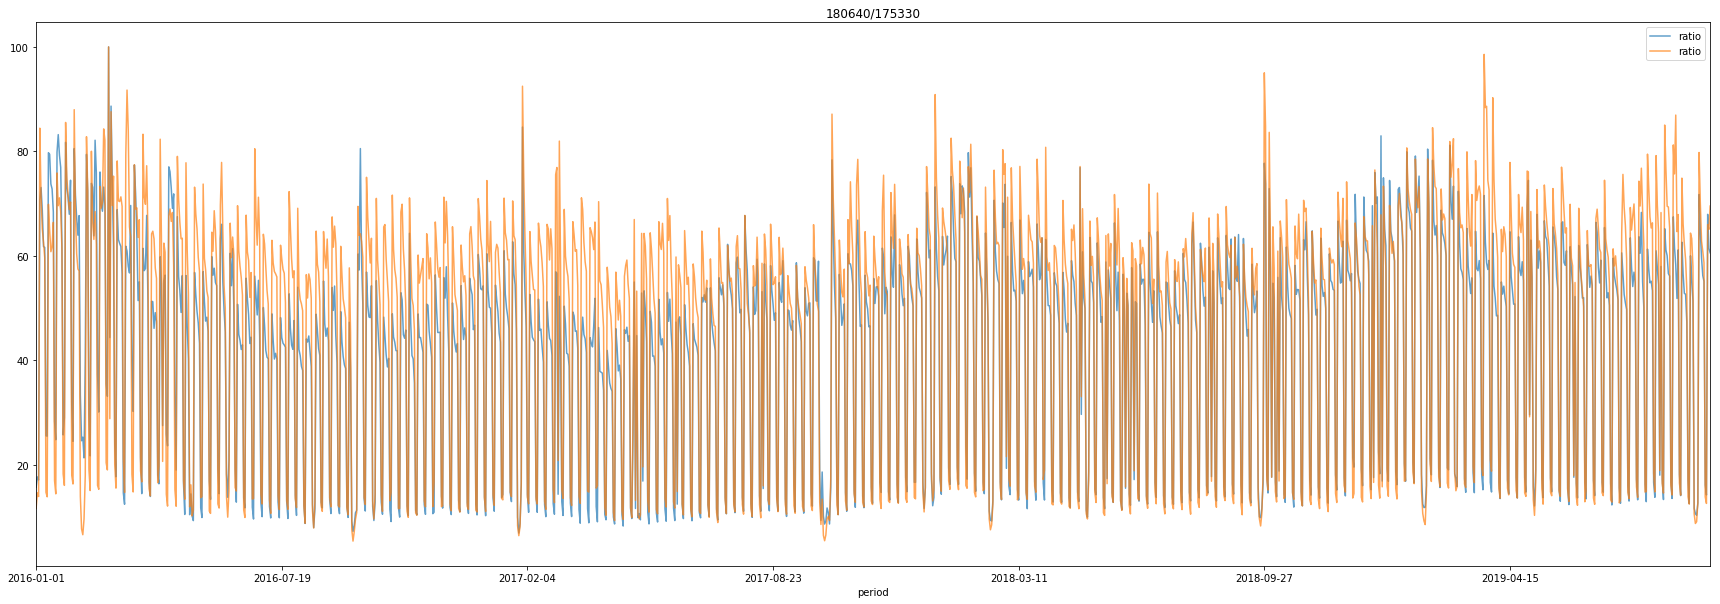

In [116]:
for top in tops:
    cc = lambda x: comp_code_cn.loc[x].values[0].zfill(6)
    df1 = pd.read_csv("./keyword/" + cc(top[0]) + ".csv", index_col="period")
    df2 = pd.read_csv("./keyword/" + cc(top[1]) + ".csv", index_col="period")
    pd.concat([df1, df2], axis=1).plot(figsize=(30,10), alpha=0.7, title=cc(top[0]) + "/" + cc(top[1]))

# 고민 사항
1. moving average?
2. 회사별 그룹핑
3. 산업별 그룹핑?
 